In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")


import data_preprocessing as dp
import metrics
import genetic_algorithm as ga

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
data = pd.read_excel('/content/final_data.xlsx')
data.head()

,Unnamed: 0,Team size**1 x Actual duration**1,Dedicated team members**1 x Actual duration**1,Actual duration**1 x Development environment adequacy**1 x 11-20**1,Team size**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,User resistance**1 x Project manager**1 x 21-30**1,Development environment adequacy**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Actual duration**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Requirment stability**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Dedicated team members**1 x Technical stability**1 x Tool availability**1,...,Dedicated team members**1 x Actual duration**1 x Economic instability impact**1,Technical stability**1 x 21-30**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Actual duration**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Users stability**1 x 1-5**1,Object points**1 x Project manager**1 x >500**1,Team size**1 x Developer**1 x >500**1,Dedicated team members**1 x Users stability**1 x Accurate requirements specifications used to develop the software system**1,Dedicated team members**1 x Team cohesion**1 x Developer incentives policy**1,Requirment stability**1 x Tool availability**1 x 11-20**1,Actual effort
0,0,18.0,18.0,0,0,0.0,0,0,0.0,42,...,18.0,0,18.0,0.0,0,6,11.333333,96,0.000000,3168.0
1,1,9.0,9.0,0,0,0.0,0,0,0.0,24,...,27.0,0,0.0,0.0,0,0,0.000000,108,0.000000,1584.0
2,2,30.0,30.0,0,0,0.0,0,0,0.0,48,...,60.0,0,0.0,0.0,0,0,0.000000,180,0.000000,5280.0
3,3,36.0,24.0,6,0,0.0,0,0,0.0,32,...,24.0,0,24.0,0.0,0,0,20.000000,16,10.031746,5280.0
4,4,216.0,216.0,24,0,0.0,0,0,0.0,36,...,648.0,0,216.0,0.0,0,0,17.000000,54,18.603175,38016.0


In [6]:
target = data['Actual effort']
X = data.drop(['Unnamed: 0', 'Actual effort'], axis = 1)

# Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 0)

In [9]:
X_train, X_test = pd.DataFrame(X_train, columns = X.columns), pd.DataFrame(X_test, columns = X.columns)

In [10]:
scaler, X_train = dp.scaling_numerical_data(X_train.columns, X_train)
X_test = scaler.transform(X_test)

## Cross Validation score

#### 10k fold cross validation

In [15]:
print('10k fold cross validation r2 score: {}'.format(cross_val_score(LinearRegression(), X_train, y_train, cv = 10).mean()))
print('10k fold cross validation mean absolute error: {}'.format(np.abs(cross_val_score(LinearRegression(), X_train, y_train, cv = 10, scoring = 'neg_mean_absolute_error').mean())))

10k fold cross validation r2 score: 0.9974152342192895
10k fold cross validation mean absolute error: 264.1351413536756


#### 5k fold cross validation

In [16]:
print('10k fold cross validation r2 score: {}'.format(cross_val_score(LinearRegression(), X_train, y_train, cv = 5).mean()))
print('10k fold cross validation mean absolute error: {}'.format(np.abs(cross_val_score(LinearRegression(), X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error').mean())))

10k fold cross validation r2 score: 0.9963913249731297
10k fold cross validation mean absolute error: 334.3310334423034


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_train, y_train), linear_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


(0.9998300461183868, 0.9961155342084607)

#### Metrics

In [ ]:
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
metrics.scores_DataFrame(y_train, y_test, train_predictions, test_predictions)

,Train score,Test score
r2_score,0.99983,0.996116
MAE,103.696691,376.529537
MMRE,0.048207,0.083299
PRED (0.25),0.964286,0.888889


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


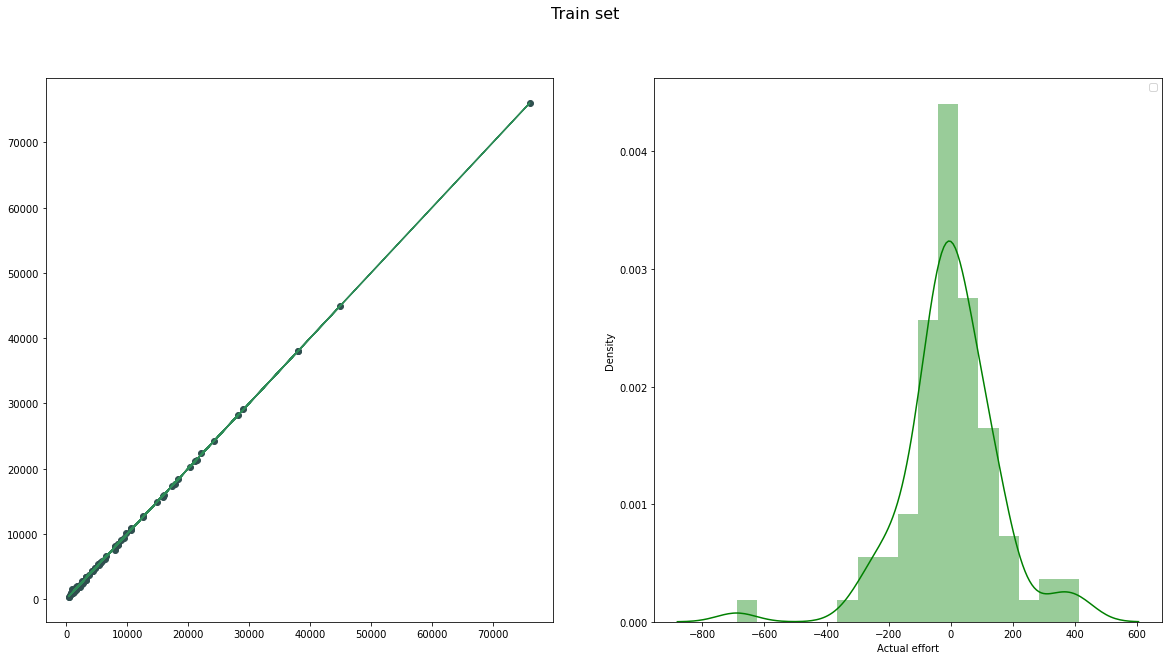

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


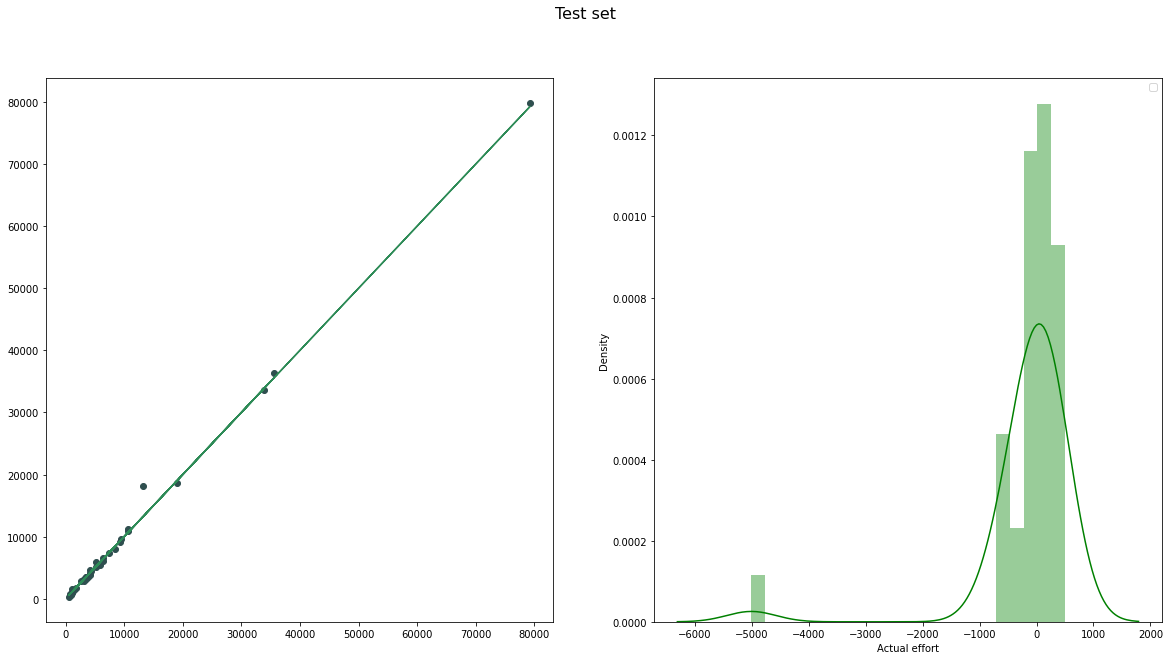

In [ ]:
metrics.plot_predictions(y_train, train_predictions, (20, 10), 'Train set')
metrics.plot_predictions(y_test, test_predictions, (20, 10), 'Test set')

# ElasticNet
Optimize LinearRegression paramaters with GA-Algorithms

LinearRegression Scores: (0.9998300461183868, 0.9961155342084607)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
params = {'alpha': np.linspace(0, 1, 100), 'l1_ratio': np.linspace(0, 1, 100), 'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'random_state': [0], 'max_iter': [10, 100, 1000, 10000], 'selection': ['cyclic', 'random']}

In [ ]:
ga_alg = ga.GeneticAlgorithm(ElasticNet(), params, X_train, y_train, 100, 1, 100)

In [ ]:
populations = ga_alg.evolution()

In [ ]:
elasticNet_model = ElasticNet(**populations[0])
elasticNet_model.fit(X_train, y_train)

ElasticNet(alpha=0.18181818181818182, l1_ratio=0.05050505050505051,
           max_iter=10000, random_state=0, tol=0.1)

In [ ]:
train_predictions = elasticNet_model.predict(X_train)
test_predictions = elasticNet_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
metrics.scores_DataFrame(y_train, y_test, train_predictions, test_predictions)

,Train score,Test score
r2_score,0.988808,0.944757
MAE,907.244148,1664.367683
MMRE,0.2367,0.269205
PRED (0.25),0.714286,0.666667


In [ ]:
pop = {'alpha': 0.6,
 'l1_ratio': 1.0,
 'max_iter': 10000,
 'random_state': 0,
 'selection': 'cyclic',
 'tol': 0.0001}
elasticNet_model = ElasticNet(**pop)
elasticNet_model.fit(X_train, y_train)
elasticNet_model.score(X_train, y_train), elasticNet_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"


(0.9998252373066874, 0.9961440690747784)